In [1]:
%matplotlib inline

# Hacky solution to set the working path to the parent folder (upis)
# It is supposed to execute only once
import os, sys
if os.getcwd().find('notebooks') >= 0:
    os.chdir(os.getcwd() + '/..')
    sys.path.append(os.getcwd() + '/sourcecode')

import matplotlib.pyplot as plt

from DataProcessor import DataProcessor
from Parser import DatasetPath
from Headers import SensorProcessedDataHeaders

In [2]:
path = DatasetPath.MIT1

dp = DataProcessor(path=path)
data = dp.process_sensors()

data.head()

,SENSOR_ID,ACTIVITY,START,END
0,100,Bathing,2003-04-01 20:51:52,2003-04-01 21:05:20
1,68,Bathing,2003-04-01 20:51:58,2003-04-01 20:52:05
2,81,Bathing,2003-04-01 20:53:36,2003-04-01 20:53:43
3,101,Bathing,2003-04-01 20:53:49,2003-04-01 21:21:43
4,93,Bathing,2003-04-01 20:53:52,2003-04-01 20:58:42


In [3]:
data['duration'] = data[SensorProcessedDataHeaders.END] - data[SensorProcessedDataHeaders.START]

data.head()

,SENSOR_ID,ACTIVITY,START,END,duration
0,100,Bathing,2003-04-01 20:51:52,2003-04-01 21:05:20,00:13:28
1,68,Bathing,2003-04-01 20:51:58,2003-04-01 20:52:05,00:00:07
2,81,Bathing,2003-04-01 20:53:36,2003-04-01 20:53:43,00:00:07
3,101,Bathing,2003-04-01 20:53:49,2003-04-01 21:21:43,00:27:54
4,93,Bathing,2003-04-01 20:53:52,2003-04-01 20:58:42,00:04:50


In [4]:
duration = data['duration'].copy()

duration.sort_values(inplace=True)

duration.head()

1227   00:00:01
1738   00:00:01
2523   00:00:01
1748   00:00:01
2521   00:00:01
Name: duration, dtype: timedelta64[ns]

In [5]:
duration = duration.apply(lambda x: x.total_seconds())

duration.value_counts().head()

3.0    291
2.0    289
1.0    229
4.0    167
5.0    127
Name: duration, dtype: int64

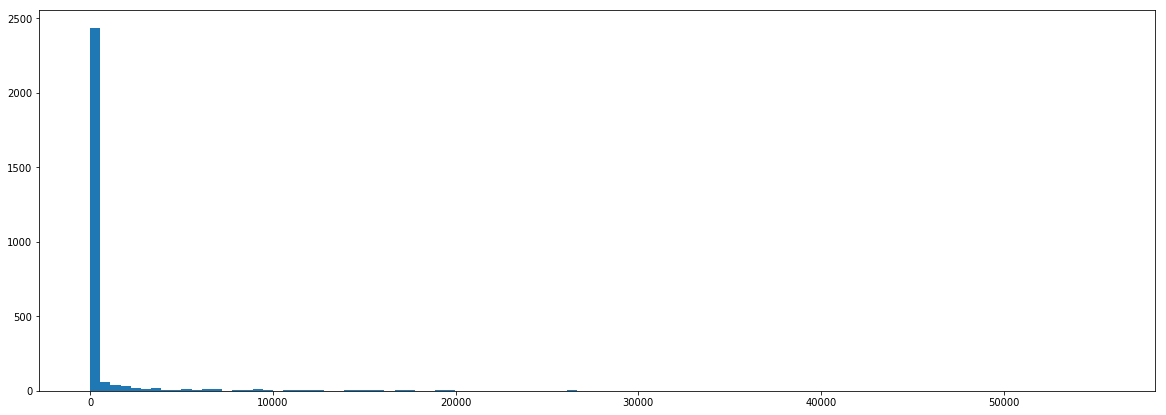

In [8]:
n_bins = 100

plt.figure(figsize=(20,7))

plt.hist(duration, bins=n_bins)
plt.ioff()